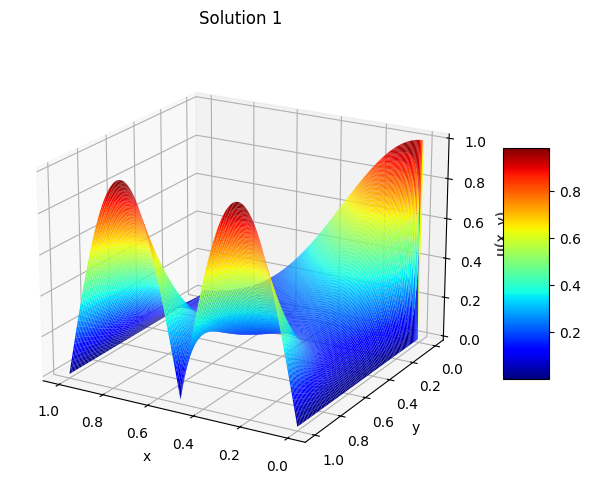

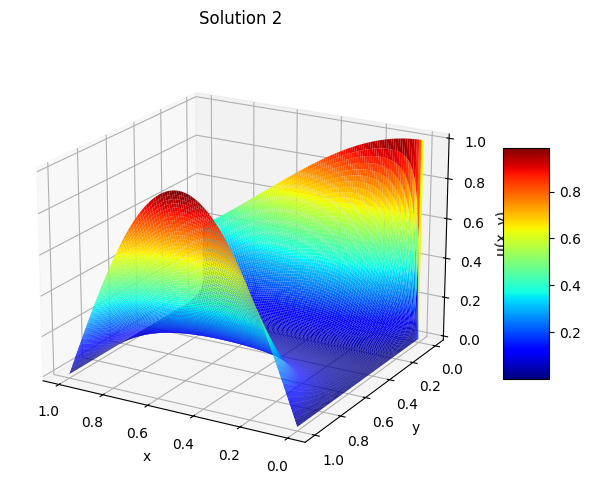

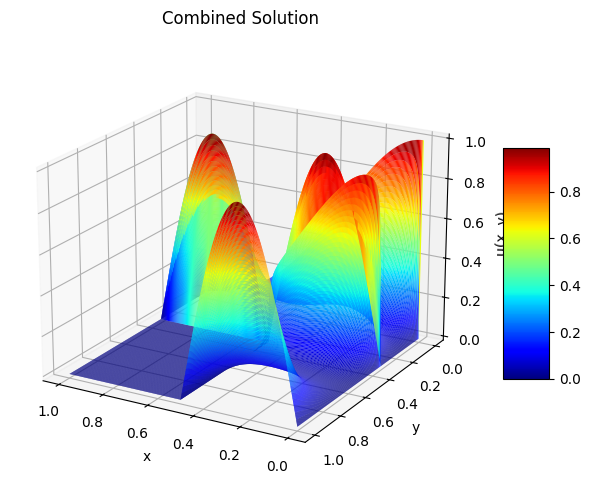

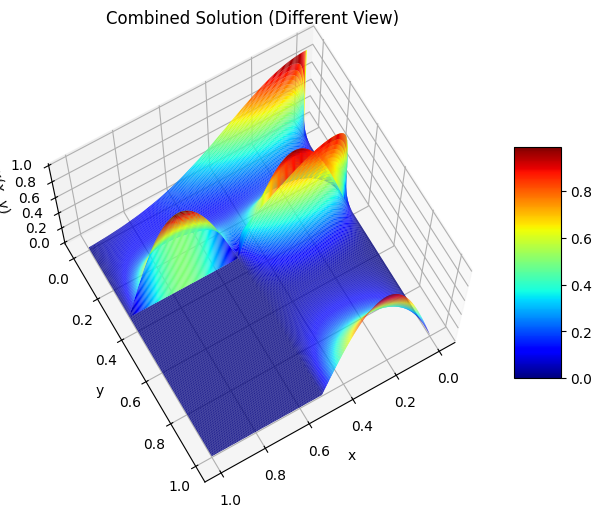

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#определение функции f и граничных условий
def f(x, y):
    return abs(1 - (x)**2 - 2*((y)**2))

def g1(y): return 0
def g2(x): return abs(math.sin(math.pi * x))
def g3(y): return 0
def g4(x): return abs(math.sin(2 * math.pi * x))
def g5(y): return 0
def g6(x): return math.e**(-((x)**2))

params1 = {
    "Ny": 100,
    "Nx": 200,
    "Lx": 2.0,
    "Ly": 1.0
}

params2 = {
    "Ny": 200,
    "Nx": 100,
    "Lx": 1.0,
    "Ly": 2.0
}

tau = 1
max_iter = 1000
tolerance = 1e-10

def solve_poisson(Nx, Ny, Lx, Ly):
    h = Ly / Ny
    u = np.zeros((Nx + 1, Ny + 1))
    fm = np.array([[f(i*h, j*h) for j in range(Ny+1)] for i in range(Nx+1)])

    u[0, :] = [g5(j*h) for j in range(Ny + 1)]
    u[-1, :] = [g1(j*h) for j in range(Ny + 1)]
    u[:, 0] = [g6(i*h) for i in range(Nx + 1)]
    u[:, -1] = [g2(i*h) for i in range(Nx + 1)]

    for _ in range(max_iter):
        u_old = u.copy()
        for i in range(1, Nx):
            for j in range(1, Ny):
                u[i, j] = (tau / 4) * ((u[i-1, j] + u[i, j-1]) + (u_old[i+1, j] + u_old[i, j+1]) - 4*(1 - 1/tau)*u_old[i, j] + fm[i, j]*h**2)
        if np.linalg.norm(u - u_old) < tolerance:
            break
    return u

u1 = solve_poisson(**params1)

u2 = solve_poisson(**params2)

Ny_combined = params1['Ny'] + params2['Ny']
Nx_combined = max(params1['Nx'], params2['Nx'])

u_combined = np.zeros((Nx_combined + 1, Ny_combined + 1))

u_combined[:params1['Nx'] + 1, :params1['Ny'] + 1] = u1

u_combined[:params2['Nx'] + 1, params1['Ny'] + 1:] = u2[:, 1:]

def plot_surface(u, title):
    Nx = u.shape[0] - 1
    Ny = u.shape[1] - 1
    x = np.linspace(0, 1, Nx+1)
    y = np.linspace(0, 1, Ny+1)
    X, Y = np.meshgrid(y, x)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=20, azim=120)
    surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    ax.set_title(title)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

plot_surface(u1, 'Solution 1')
plot_surface(u2, 'Solution 2')
plot_surface(u_combined, 'Combined Solution')

def plot_surface_different_view(u, title):
    Nx = u.shape[0] - 1
    Ny = u.shape[1] - 1
    x = np.linspace(0, 1, Nx+1)
    y = np.linspace(0, 1, Ny+1)
    X, Y = np.meshgrid(y, x)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=70, azim=60)
    surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    ax.set_title(title)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

plot_surface_different_view(u_combined, 'Combined Solution (Different View)')
